# Рубежный контроль №1
## Технологии разведочного анализа и обработки данных.

Задача: Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

Датасет: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

In [9]:
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer

## Общая информация о данных

In [10]:
data = pd.read_csv('states_all.csv', sep=',')

In [11]:
data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [12]:
data.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1715.000000,1.224000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.224000e+03,...,1632.000000,1632.000000,1632.000000,1.020000e+03,1.071000e+03,1.632000e+03,565.000000,602.000000,650.000000,562.000000
mean,2002.075219,9.175416e+05,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,4.299509e+05,...,69166.507966,68106.537377,58420.870711,5.779547e+05,2.820691e+05,9.139695e+05,236.327434,278.280731,218.806154,263.558719
std,9.568621,1.066514e+06,1.175962e+07,1.146992e+06,5.549735e+06,5.489562e+06,1.199279e+07,6.300569e+06,3.357214e+06,5.347893e+05,...,79957.990356,77965.847263,67438.530709,6.757837e+05,3.307098e+05,1.055893e+06,9.285505,10.343482,7.681805,6.612601
min,1986.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,4577.000000,3371.000000,2572.000000,3.769800e+04,1.353000e+04,6.844900e+04,192.000000,231.000000,179.000000,236.000000
25%,1994.000000,2.645145e+05,2.189504e+06,1.899575e+05,1.165776e+06,7.151210e+05,2.170404e+06,1.171336e+06,6.380760e+05,1.034492e+05,...,18971.500000,19594.250000,16076.500000,1.649250e+05,8.060800e+04,2.480832e+05,232.000000,272.000000,215.000000,260.000000
50%,2002.000000,6.499335e+05,5.085826e+06,4.035480e+05,2.537754e+06,2.058996e+06,5.242672e+06,2.658253e+06,1.525471e+06,2.717040e+05,...,49087.000000,47880.000000,39408.000000,4.051115e+05,1.869190e+05,6.458050e+05,238.000000,280.500000,220.000000,265.000000
75%,2010.000000,1.010532e+06,1.084516e+07,8.279320e+05,5.055548e+06,4.755293e+06,1.074420e+07,5.561959e+06,3.222924e+06,5.172222e+05,...,78504.250000,78976.000000,69397.250000,6.439752e+05,3.223280e+05,1.043420e+06,242.000000,286.000000,224.000000,268.000000
max,2019.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,6.441557e+06,253.000000,301.000000,237.000000,280.000000


In [13]:
data.dtypes

PRIMARY_KEY                      object
STATE                            object
YEAR                              int64
ENROLL                          float64
TOTAL_REVENUE                   float64
FEDERAL_REVENUE                 float64
STATE_REVENUE                   float64
LOCAL_REVENUE                   float64
TOTAL_EXPENDITURE               float64
INSTRUCTION_EXPENDITURE         float64
SUPPORT_SERVICES_EXPENDITURE    float64
OTHER_EXPENDITURE               float64
CAPITAL_OUTLAY_EXPENDITURE      float64
GRADES_PK_G                     float64
GRADES_KG_G                     float64
GRADES_4_G                      float64
GRADES_8_G                      float64
GRADES_12_G                     float64
GRADES_1_8_G                    float64
GRADES_9_12_G                   float64
GRADES_ALL_G                    float64
AVG_MATH_4_SCORE                float64
AVG_MATH_8_SCORE                float64
AVG_READING_4_SCORE             float64
AVG_READING_8_SCORE             float64


In [14]:
data.isnull().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL                           491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
GRADES_PK_G                      173
GRADES_KG_G                       83
GRADES_4_G                        83
GRADES_8_G                        83
GRADES_12_G                       83
GRADES_1_8_G                     695
GRADES_9_12_G                    644
GRADES_ALL_G                      83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

## Заполнение пропусков

Посмотрим процент пропусков для каждой из колонок

In [15]:
total_rows = data.shape[0]
for col in data.columns:
    null_count = data[data[col].isnull()].shape[0]
    col_type = str(data[col].dtype)
    print(f' {col}, ( {col_type} ) , data loss {null_count / total_rows * 100:.2f}%')

 PRIMARY_KEY, ( object ) , data loss 0.00%
 STATE, ( object ) , data loss 0.00%
 YEAR, ( int64 ) , data loss 0.00%
 ENROLL, ( float64 ) , data loss 28.63%
 TOTAL_REVENUE, ( float64 ) , data loss 25.66%
 FEDERAL_REVENUE, ( float64 ) , data loss 25.66%
 STATE_REVENUE, ( float64 ) , data loss 25.66%
 LOCAL_REVENUE, ( float64 ) , data loss 25.66%
 TOTAL_EXPENDITURE, ( float64 ) , data loss 25.66%
 INSTRUCTION_EXPENDITURE, ( float64 ) , data loss 25.66%
 SUPPORT_SERVICES_EXPENDITURE, ( float64 ) , data loss 25.66%
 OTHER_EXPENDITURE, ( float64 ) , data loss 28.63%
 CAPITAL_OUTLAY_EXPENDITURE, ( float64 ) , data loss 25.66%
 GRADES_PK_G, ( float64 ) , data loss 10.09%
 GRADES_KG_G, ( float64 ) , data loss 4.84%
 GRADES_4_G, ( float64 ) , data loss 4.84%
 GRADES_8_G, ( float64 ) , data loss 4.84%
 GRADES_12_G, ( float64 ) , data loss 4.84%
 GRADES_1_8_G, ( float64 ) , data loss 40.52%
 GRADES_9_12_G, ( float64 ) , data loss 37.55%
 GRADES_ALL_G, ( float64 ) , data loss 4.84%
 AVG_MATH_4_SCORE

<AxesSubplot:xlabel='GRADES_ALL_G', ylabel='Count'>

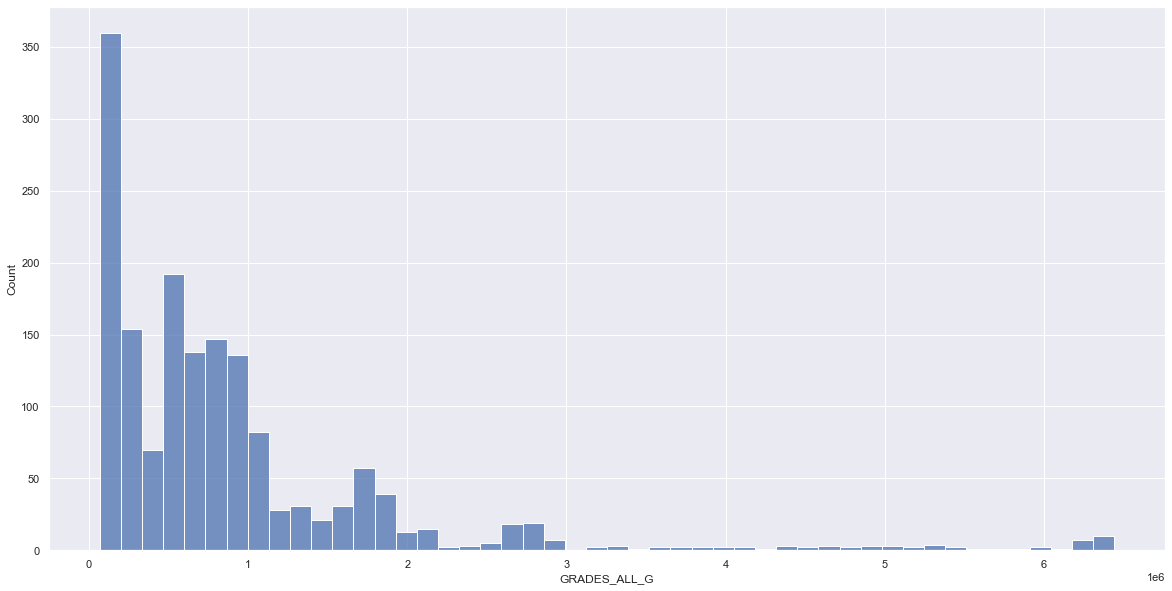

In [16]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.histplot(data=data['GRADES_ALL_G'])

Заполним ее с применением различных стратегий

<AxesSubplot:ylabel='Count'>

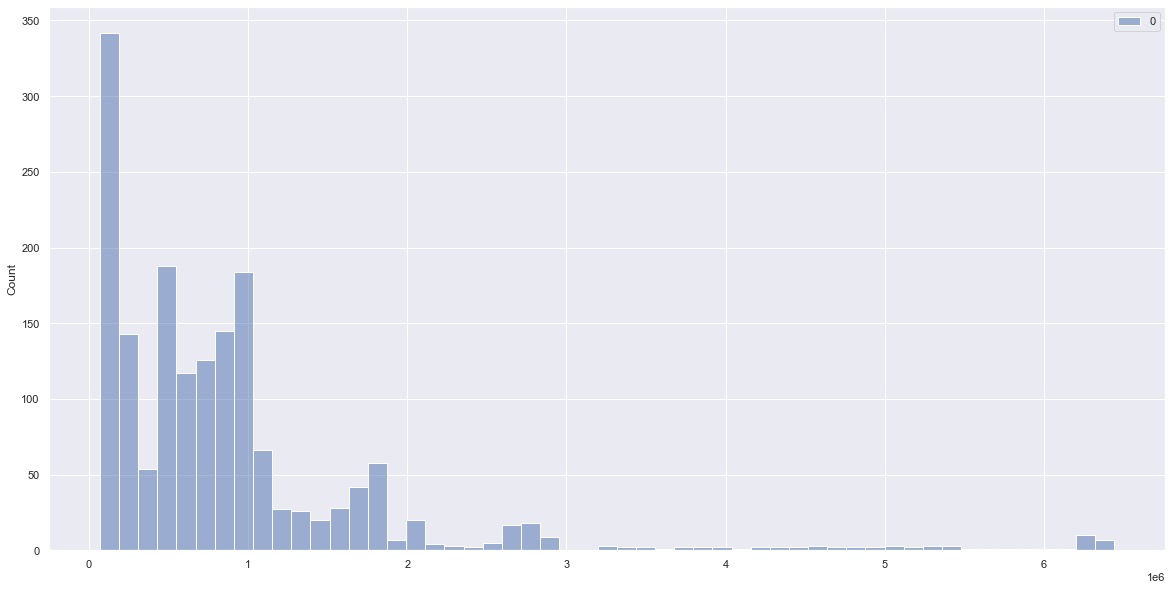

In [17]:
# Заполнение средним
mean_imp = SimpleImputer(strategy='mean')
tot_exp_mean = mean_imp.fit_transform(data[['GRADES_ALL_G']])
sns.histplot(data=tot_exp_mean)

<AxesSubplot:ylabel='Count'>

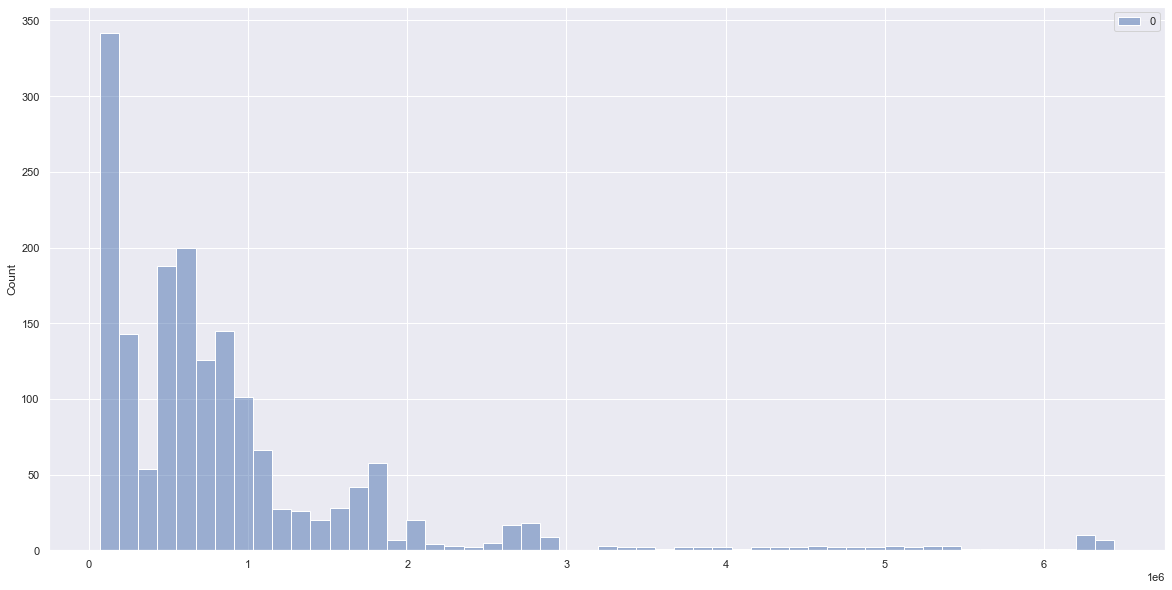

In [18]:
# Заполнение медианой
median_imp = SimpleImputer(strategy='median')
tot_exp_mean = median_imp.fit_transform(data[['GRADES_ALL_G']])
sns.histplot(data=tot_exp_mean)

<AxesSubplot:ylabel='Count'>

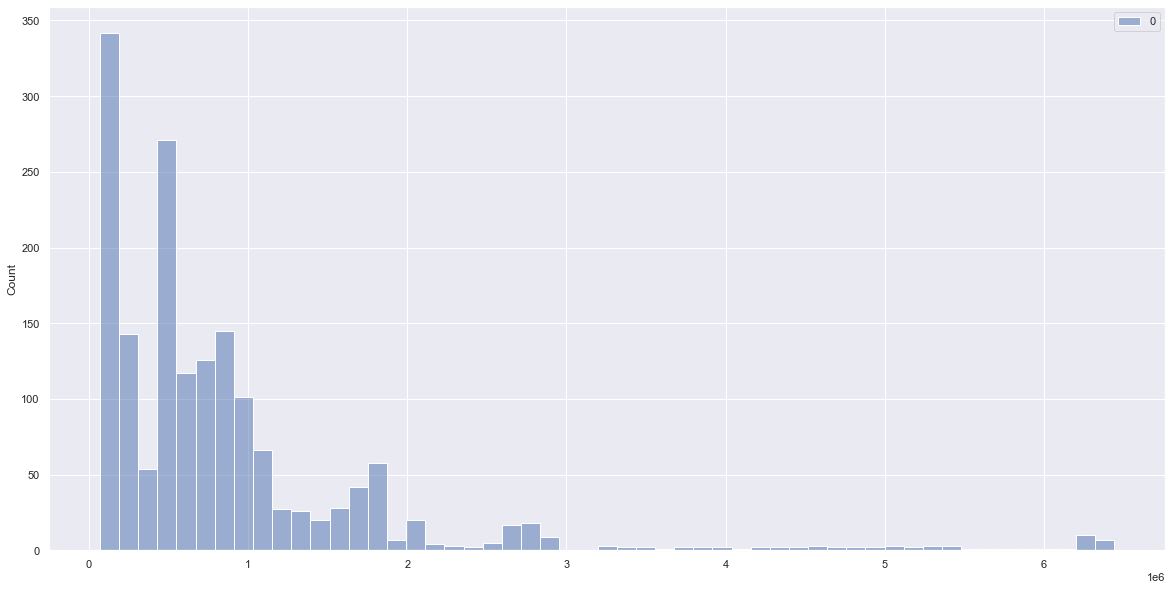

In [19]:
# Заполнение модой
most_freq_imp = SimpleImputer(strategy='most_frequent')
tot_exp_mean = most_freq_imp.fit_transform(data[['GRADES_ALL_G']])
sns.histplot(data=tot_exp_mean)

Для обработки пропусков был использован класс SimpleImputer и рассмотрены три стратегии, которые он реализует: заполнение средним, медианой и модой. Для колонки GRADES_ALL_G, исходя из гистограмм, лучшего всего подходит заполнение средним, т.к. не так сильно влияет на плотность вероятности распределения.

Для заполнения пропусков в категориальных признаках также используется класс SimpleImputer, только в этом случае он реализует стратегии most frequent (заполнение самым часто встречаемым значением) и constant (заполнение некторой константой).

Для дальнейшего построения модели точно следует исключить признаки AVG_MATH_4_SCORE, AVG_MATH_8_SCORE, AVG_READING_4_SCORE и AVG_READING_8_SCORE, т.к. они имеют слишком много пропусков. Следует оставить колонки GRADES_PK_G, GRADES_KG_G, GRADES_4_G, GRADES_8_G, GRADES_12_G и GRADES_ALL_G т.к. в каждой из них меньше 5 процентов пропусков